In [2]:
#!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 7.9 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import pathlib
import numpy as np
import networkx
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon, LineString

# Storm Forecasts & Track
Storm forecasts and historical track will be published for each in-game day.

The forecasts represent model predictions for where the hurricane might be at the given timestamp.

The storm track represents the true path that the storm took in the past.

In [9]:
random_color = lambda: np.random.random(3)

In [6]:
# Forecasts
day1_forecast = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final_2024/day1/day1_forecasts_2024.geojson')

In [7]:
# look at the forecasts
day1_forecast

,prediction,forecastHour,datetime,maxWinds,category,geometry
0,1,12,2023-08-02 08:00:00,70,1,POINT (-69.75497 37.90491)
1,1,24,2023-08-02 20:00:00,75,1,POINT (-70.50738 38.86856)
2,1,36,2023-08-03 08:00:00,85,2,POINT (-71.35866 39.41313)
3,1,48,2023-08-03 20:00:00,85,2,POINT (-71.72152 40.51758)
4,1,60,2023-08-04 08:00:00,100,3,POINT (-71.48969 41.18486)
...,...,...,...,...,...,...
155,20,48,2023-08-03 20:00:00,85,2,POINT (-71.49297 40.27587)
156,20,60,2023-08-04 08:00:00,100,3,POINT (-70.95934 42.12895)
157,20,72,2023-08-04 20:00:00,105,3,POINT (-71.61717 40.70945)
158,20,96,2023-08-05 20:00:00,90,2,POINT (-70.44554 43.65152)


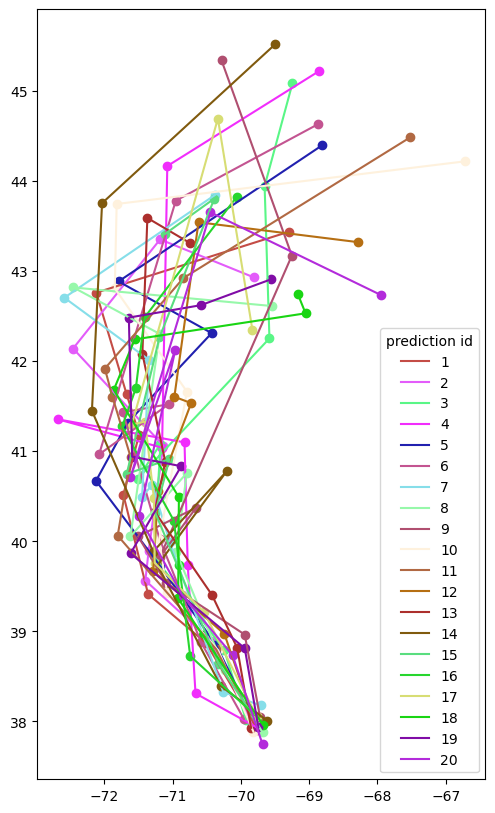

In [10]:
# each forecast report has a number of possible hurricane routes
# they are identified by the prediction column
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for pred_id, pred in day1_forecast.groupby('prediction'):
    c = random_color()
    pred.plot(color=c, ax=ax)
    line_to_plot = LineString(pred.geometry.values)
    ax.plot(line_to_plot.xy[0], line_to_plot.xy[1], color=c, label=f'{pred_id}')
ax.legend(title='prediction id')

<Axes: >

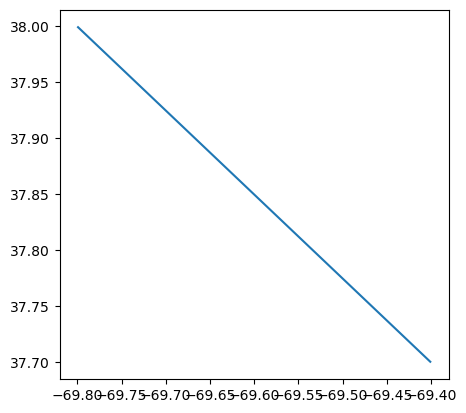

In [11]:
# track shows where the storm actually went in the past
day1_track = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final_2024/day1/day1_track_past.geojson')
day1_track.plot()

# Location of Areas of Interest


In [12]:
#!wget https://files.bwsi-remote-sensing.net/data/final/R1-Hospitals.zip -O R1-Hospitals.zip
#!unzip R1-Hospitals.zip
#sensing.net/data/final_2024/Hospitals_2024.geojson Hospitals_2024.geojson # can use this if we want

--2024-07-30 18:47:31--  https://files.bwsi-remote-sensing.net/data/final/R1-Hospitals.zip
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 35.82.230.83, 44.240.16.119, 44.239.244.82, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|35.82.230.83|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-30 18:47:31 ERROR 404: Not Found.

Archive:  R1-Hospitals.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of R1-Hospitals.zip or
        R1-Hospitals.zip.zip, and cannot find R1-Hospitals.zip.ZIP, period.


In [13]:
#!wget https://files.bwsi-remote-sensing.net/data/final/R1-Shelters.zip -O R1-Shelters.zip
#!unzip R1-Shelters.zip

--2024-07-30 18:47:37--  https://files.bwsi-remote-sensing.net/data/final/R1-Shelters.zip
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 44.239.244.82, 52.39.175.7, 44.240.16.119, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|44.239.244.82|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-30 18:47:37 ERROR 404: Not Found.

Archive:  R1-Shelters.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of R1-Shelters.zip or
        R1-Shelters.zip.zip, and cannot find R1-Shelters.zip.ZIP, period.


In [16]:
hospitals_gdf = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final_2024/Hospitals_2024.geojson')
shelters_gdf = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final_2024/Shelters_2024.geojson')

In [17]:
hospitals_gdf

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,49,0013402908,VA MEDICAL CENTER - PROVIDENCE,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.providence.va.gov/,NOT AVAILABLE,NOT AVAILABLE,44,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,N,POINT (-71.43315 41.83214)
1,98,0000502891,WESTERLY HOSPITAL,25 WELLS ST,WESTERLY,RI,02891,NOT AVAILABLE,(401) 596-6000,GENERAL ACUTE CARE,...,http://www.westerlyhospital.org/,6,NOT AVAILABLE,44,NON-PROFIT,-999,125.0,NOT AVAILABLE,N,POINT (-71.82530 41.36219)
2,116,0009802703,ARBOUR FULLER HOSPITAL,200 MAY STREET,ATTLEBORO,MA,02703,NOT AVAILABLE,(508) 761-8500,PSYCHIATRIC,...,http://arbourhealth.com/organizations/arbour-f...,2836,NOT AVAILABLE,25,PROPRIETARY,-999,103.0,NOT AVAILABLE,N,POINT (-71.36112 41.92408)
3,117,0009702146,ARBOUR HUMAN RESOURCE INSTITUTE,227 BABCOCK STREET,BROOKLINE,MA,02146,NOT AVAILABLE,(617) 731-3200,PSYCHIATRIC,...,http://arbourhealth.com/organizations/arbour-h...,2005,NOT AVAILABLE,25,PROPRIETARY,-999,66.0,NOT AVAILABLE,N,POINT (-71.12124 42.35078)
4,120,0003906250,"NATCHAUG HOSPITAL, INC.",189 STORRS RD,MANSFIELD CENTER,CT,06250,NOT AVAILABLE,(860) 456-1311,PSYCHIATRIC,...,http://www.natchaug.org/,NOT AVAILABLE,NOT AVAILABLE,09,NON-PROFIT,-999,57.0,NOT AVAILABLE,N,POINT (-72.19801 41.74110)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,7578,0018971434,TARAVISTA BEHAVIORAL HEALTH CENTER,85 PATTON ROAD,AYER,MA,01434,NOT AVAILABLE,(978) 615-5200,PSYCHIATRIC,...,https://www.taravista.care/,2AY6,NOT AVAILABLE,25,NOT AVAILABLE,-999,108.0,NOT AVAILABLE,N,POINT (-71.61498 42.53026)
347,7609,0196706457,WHITING FORENSIC HOSPITAL,70 OBRIEN DR,MIDDLETOWN,CT,06457,3945,(860) 262-5400,PSYCHIATRIC,...,https://portal.ct.gov/dmhas/wfh/whiting-forens...,NOT AVAILABLE,NOT AVAILABLE,09,GOVERNMENT - STATE,-999,229.0,NOT AVAILABLE,N,POINT (-72.62589 41.55204)
348,7682,0196784161,THE CONNECTICUT HOSPICE INC,100 DOUBLE BEACH RD,BRANFORD,CT,06405,4909,NOT AVAILABLE,GENERAL ACUTE CARE,...,NOT AVAILABLE,67,NOT AVAILABLE,09,NOT AVAILABLE,-999,-999.0,NOT AVAILABLE,NOT AVAILABLE,POINT (-72.83284 41.25681)
349,7723,0196784202,HARTFORD HOSPITAL (INSTITUTE OF LIVING),200 RETREAT AVENUE,HARTFORD,CT,06106,3315,NOT AVAILABLE,GENERAL ACUTE CARE,...,NOT AVAILABLE,46,NOT AVAILABLE,09,NOT AVAILABLE,-999,-999.0,NOT AVAILABLE,NOT AVAILABLE,POINT (-72.68213 41.74967)


In [18]:
shelters_gdf

,SHELTER_ID,SHELTER_NAME,ADDRESS_1,CITY,COUNTY_PARISH,FIPS_CODE,STATE,ZIP,MAIL_ADDR_SAME_AS_PHYS_ADDR,MAILING_ADDRESS_1,...,SCORE,STATUS,MATCH_TYPE,LOC_NAME,GEOX,GEOY,FACILITY_TYPE,SUBFACILITY_CODE,DATA_SOURCE_ID,geometry
0,218372,Chazy Central School,609 Miner Farm Road,CHAZY,CLINTON,,NY,12921,YES,,...,100.0,M,A,Street,-73.433769,44.887701,SHELTER,GENPOPSHEL,0.0,POINT (-73.43377 44.88770)
1,183805,Ansonia High School,20 Pulaski Hwy,Ansonia,NEW HAVEN,,CT,6401,YES,,...,81.0,M,A,Street,-73.064238,41.329884,SHELTER,GENPOPSHEL,0.0,POINT (-73.06424 41.32988)
2,184071,GRANBY MIDDLE SCHOOL,321 SALMON BROOK ST,GRANBY,HARTFORD,,CT,06035,NO,,...,81.0,M,A,Street,-72.790043,41.956001,SHELTER,GENPOPSHEL,0.0,POINT (-72.79004 41.95600)
3,119033,Worcester Senior Center,128 PROVIDENCE ST,WORCESTER,WORCESTER,,MA,01604,NO,,...,81.0,M,A,Street,-71.792237,42.247570,SHELTER,OTHER,0.0,POINT (-71.79224 42.24757)
4,71719,Jefferson Village School,48 Washington Rd,JEFFERSON,LINCOLN,,ME,04348,NO,Box 260,...,81.0,M,A,Street,-69.432074,44.222706,SHELTER,GENPOPSHEL,0.0,POINT (-69.43207 44.22271)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,365208,Conard High School,100 Beecwood Rd,West Hartford,Hartford,NaN,CT,6106,NaN,NaN,...,NaN,NaN,NaN,Street,-72.752085,41.735502,SHELTER,EMEREVAC,101.0,POINT (-72.75208 41.73550)
4581,365254,Lewiston High School,156 East Ave,Lewiston,Androscoggin,NaN,ME,4240,NaN,NaN,...,NaN,NaN,NaN,Street,-70.202282,44.093143,SHELTER,GENPOPSHEL,101.0,POINT (-70.20228 44.09314)
4582,365358,Weymouth High School (Regional Center),1 Wildcat Way,Weymouth,Norfolk,NaN,MA,2190,NaN,NaN,...,NaN,NaN,NaN,Street,-70.942783,42.182527,SHELTER,GENPOPSHEL,101.0,POINT (-70.94278 42.18253)
4583,365363,Holy Trinity Church,1409 Park Ave,Woonsocket,Providence,NaN,RI,2895,NaN,NaN,...,NaN,NaN,NaN,Street,-71.516473,41.984584,SHELTER,GENPOPSHEL,101.0,POINT (-71.51647 41.98458)


# Game Grid
This is the grid that represents the scope of the response, and also the transportation network
It uses the [Military Grid Reference System](https://en.wikipedia.org/wiki/Military_Grid_Reference_System) to divide the world into a grid. There is a unique alphanumeric string that identifies each cell. We are working at the 1km resolution of the grid. See also the [US National Grid](https://www.fgdc.gov/usng/how-to-read-usng) which is nearly identical, except for some [edge-cases](https://www.maptools.com/tutorials/mgrs_usng_diffs).

The `MGRS` column is a unique alphanumeric ID for each cell. It should be used as your node ID for your transport network.

In [19]:
# downloading pre-hurricane game grid (pretty big file ~ 111 MB)
#!wget https://files.bwsi-remote-sensing.net/data/final/game_grid_2022.geojson

In [20]:
game_grid = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final_2024/game_grid_2024.geojson')

In [21]:
game_grid

,EASTING,NORTHING,kmSQ_ID,GZD,Shape_Leng,MGRS,MGRS_10km,transport_score,geometry
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-73.76921 45.00282, -73.78190 45.002..."
1,597000mE,4984000mN,WQ,18T,400000.000000,18TWQ9784,18TWQ98,1,"POLYGON ((-73.75653 45.00268, -73.76921 45.002..."
2,598000mE,4984000mN,WQ,18T,400000.000000,18TWQ9884,18TWQ98,1,"POLYGON ((-73.74384 45.00254, -73.75653 45.002..."
3,599000mE,4984000mN,WQ,18T,400000.000000,18TWQ9984,18TWQ98,1,"POLYGON ((-73.73116 45.00240, -73.74384 45.002..."
4,579000mE,4983000mN,WQ,18T,400000.000000,18TWQ7983,18TWQ78,1,"POLYGON ((-73.98504 44.99594, -73.99773 44.996..."
...,...,...,...,...,...,...,...,...,...
232562,282000mE,4558000mN,BF,19T,0.041828,19TBF8258,19TBF85,1,"POLYGON ((-71.58574 41.14431, -71.59765 41.144..."
232563,283000mE,4558000mN,BF,19T,0.041828,19TBF8358,19TBF85,1,"POLYGON ((-71.57384 41.14458, -71.58574 41.144..."
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-71.56193 41.14484, -71.57384 41.144..."
232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1,"POLYGON ((-71.55003 41.14511, -71.56193 41.144..."


## Overall bounds of map
Useful for all teams to find additional GIS and remote sensing resources to use

In [22]:
w,s,e,n = game_grid.total_bounds
print(w,s,e,n)

-74.0062751207002 40.995556258214776 -66.93832921282291 47.46624330268622


## Get the cells neighboring each cell
Buffer and use spatial join with `overlap` to find which cells are neighboring each other

In [23]:
buffered_game_grid = game_grid.to_crs('epsg:3857')
buffered_game_grid.geometry = buffered_game_grid.buffer(10)
neighboring_gdf = gpd.sjoin(buffered_game_grid, game_grid.to_crs('epsg:3857'), predicate='overlaps')

In [24]:
neighboring_gdf

,EASTING_left,NORTHING_left,kmSQ_ID_left,GZD_left,Shape_Leng_left,MGRS_left,MGRS_10km_left,transport_score_left,geometry,index_right,EASTING_right,NORTHING_right,kmSQ_ID_right,GZD_right,Shape_Leng_right,MGRS_right,MGRS_10km_right,transport_score_right
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-8211941.372 5621964.655, -8211941.4...",20,595000mE,4983000mN,WQ,18T,400000.000000,18TWQ9583,18TWQ98,1
19,594000mE,4983000mN,WQ,18T,400000.000000,18TWQ9483,18TWQ98,1,"POLYGON ((-8214786.705 5620590.448, -8214786.7...",20,595000mE,4983000mN,WQ,18T,400000.000000,18TWQ9583,18TWQ98,1
21,596000mE,4983000mN,WQ,18T,400000.000000,18TWQ9683,18TWQ98,1,"POLYGON ((-8211962.822 5620547.855, -8211962.8...",20,595000mE,4983000mN,WQ,18T,400000.000000,18TWQ9583,18TWQ98,1
40,594000mE,4982000mN,WQ,18T,400000.000000,18TWQ9482,18TWQ98,1,"POLYGON ((-8214807.702 5619173.847, -8214807.7...",20,595000mE,4983000mN,WQ,18T,400000.000000,18TWQ9583,18TWQ98,1
41,595000mE,4982000mN,WQ,18T,400000.000000,18TWQ9582,18TWQ98,1,"POLYGON ((-8213395.977 5619152.672, -8213396.0...",20,595000mE,4983000mN,WQ,18T,400000.000000,18TWQ9583,18TWQ98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-7966228.122 5033729.753, -7966228.1...",232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1
232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1,"POLYGON ((-7963577.664 5033807.714, -7963577.6...",232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1
232559,285000mE,4559000mN,BF,19T,0.041832,19TBF8559,19TBF85,2,"POLYGON ((-7964941.744 5035099.209, -7964941.7...",232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1
232560,286000mE,4559000mN,BF,19T,0.041832,19TBF8659,19TBF85,1,"POLYGON ((-7963616.325 5035138.116, -7963616.3...",232566,286000mE,4558000mN,BF,19T,0.041829,19TBF8658,19TBF85,1


## Create network representation

In [25]:
transport_network = networkx.DiGraph()
transport_network.add_nodes_from(game_grid['MGRS']) #add nodes, 1 for every entry of MGRS
# calculate travel time as an edge feature
neighboring_gdf['travel_time'] = 20/ (neighboring_gdf['transport_score_left'] + neighboring_gdf['transport_score_right'])
# create edges from (origin, destination, travel_time)
transport_network.add_weighted_edges_from(zip(neighboring_gdf['MGRS_left'], neighboring_gdf['MGRS_right'], neighboring_gdf['travel_time']))

In [26]:
networkx.write_graphml(transport_network, 'transport_network_pre.graphml')

In [28]:
transport_network_loaded = networkx.read_graphml('transport_network_pre.graphml')

KeyboardInterrupt: 

## Visualizing the transport score
Highways and major roads have highest transport score. Rural areas have lowest transport score. Cities have intermediate transport score to model local roads

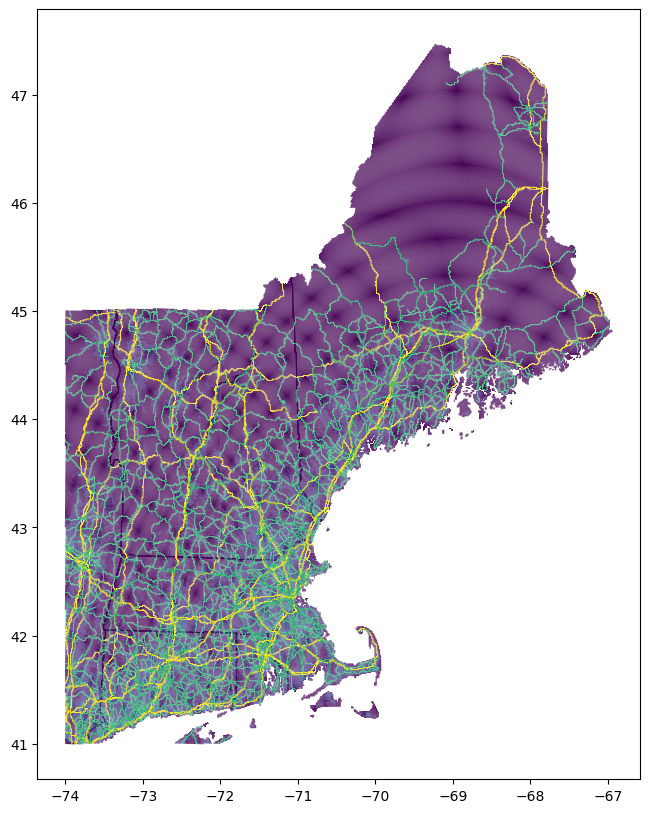

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
game_grid.plot(column='transport_score', ax=ax)
plt.show()

In [34]:
# plotting a route
def plot_route(game_grid, transport_network, route, ax, buffer=0.01, color=None):
    '''
    plots a route on the game_grid network
    
    game_grid: gdf of the game grid
    transport_network: networkx object representing network
    route: list of MGRS ID's of shelters in order of the route
    buffer: how much to buffer the routes for visibility
    ax: matplotlib axes object to plot on
    color: color of the route to plot
    '''
    if color == None:
        color = np.random.random(3)
    full_route = []
    for idx in range(len(route)-1):
        orig = route[idx]
        dest = route[idx+1]
        full_route = full_route + networkx.astar_path(transport_network, orig, dest)
    game_grid.set_index('MGRS').loc[full_route].buffer(buffer).plot(ax=ax, color=color)

AttributeError: 'NoneType' object has no attribute 'shape'

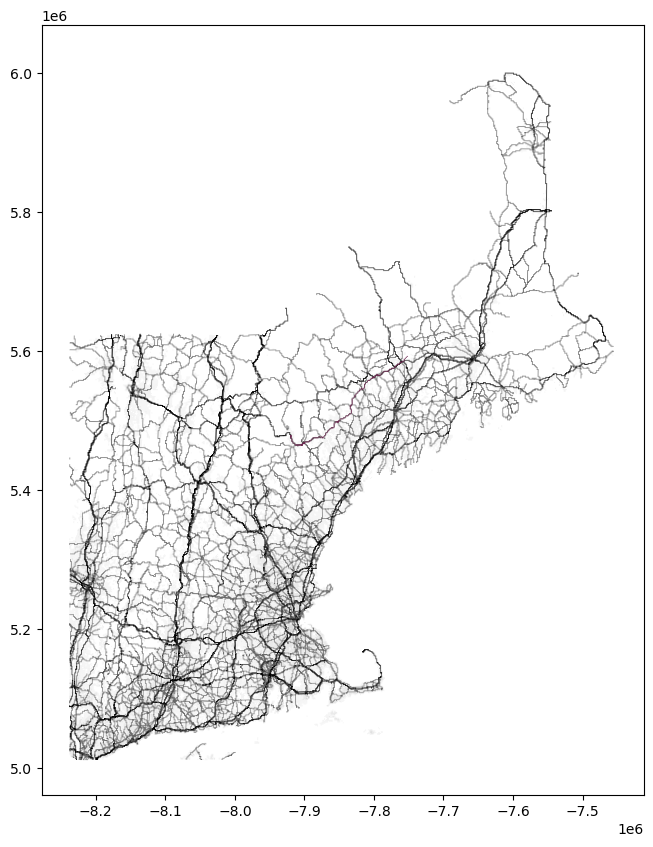

In [35]:
game_grid = game_grid.to_crs(epsg=3857)
# example of plotting transport score and route
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
game_grid.plot(column='transport_score', cmap='Greys', alpha=0.8, ax=ax)
#plotting for random origin and destination for reference
plot_route(game_grid,
           transport_network, 
           [np.random.choice(game_grid['MGRS']),
            np.random.choice(game_grid['MGRS'])],
           ax=ax,
           buffer=0.01)
ctx.add_basemap(ax,
                crs=game_grid.crs,
                source=ctx.providers.Stamen.TonerBackground)
ax.set_xlim([w,e]) # from overall bounds
ax.set_ylim([s,n])
plt.show()